<a href="https://colab.research.google.com/github/victor-octavio/trabalho-estatistica/blob/main/Trabalho_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
install.packages("ggplot2")
library(ggplot2)
install.packages("gmodels")
library(gmodels)

bd <- read.csv2("BD_trab1.csv", header = TRUE)
bd

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



id,grupo,semanasevolucao,diassintomas,tipodeparto,corpele,sexobebe,idade,pesobebeint,pesobebealta,fumo
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,32.85,6,2,1,2,35,1500,1900,1
2,1,36.00,4,1,1,2,43,2010,2500,2
3,1,29.00,1,1,1,2,15,1030,1050,1
4,1,27.00,1,2,1,1,14,980,1500,1
5,1,25.00,1,1,1,1,34,520,1000,1
6,2,32.85,1,2,1,1,23,1980,1980,2
7,2,31.85,67,1,1,2,27,2000,2300,1
8,2,30.28,7,2,1,2,25,865,2000,2
9,2,32.43,4,1,1,2,39,2240,2200,1


In [61]:
pesoint <- bd$pesobebeint
maiorPeso <- max(pesoint)
menorPeso <- min(pesoint)
msg <- paste("Maior peso internação:", as.character(maiorPeso))
msg2 <- paste("\nMaior peso internação:", as.character(menorPeso))

cat(msg)
cat(msg2)


Maior peso internação: 2340
Maior peso internação: 410

# Questão 1)
- Análise descritiva dos dados (escolha 3 variáveis), estruture uma tabela utilizando como modelo tabela disponível em um artigo na área da saúde (qualquer assunto) e interprete os resultados descritivos de todas as variáveis incluídas na tabela.

- Grupo, Status Tabágico e Tipo de Parto



In [39]:
# Mapeando a variável Grupo em 1 = Infecção por Pseudomona aeruginosa e 2 = Infecção por outros germes
Grupo <- bd$grupo
Grupo <- factor(bd$grupo, levels = c(1, 2), labels = c("Infecção por Pseudomona aeruginosa", "Infecção por outros germes"))

# Mapeando a variável Tipo de Parto em 1 = Vaginal e 2 = Cesariano
Tipo_de_Parto <- bd$tipodeparto
Tipo_de_Parto <- factor(bd$tipodeparto, levels = c(1, 2), labels = c("Vaginal", "Cesariano"))

# Mapeando a variável Status Tabágico da Mãe em 1 = Fumante, 2 = Não fumante e 3 = Ex-fumante
Status_Fumo <- bd$fumo
Status_Fumo <- factor(bd$fumo, levels = c(1, 2, 3), labels = c("Fumante", "Não fumante", "Ex-fumante")) #Mapeia os tipos de fumo para os labels respectivos

# Contagem dos casos para a variável Grupo
contagem_grupo <- table(Grupo)
# Cálculo da porcentagem
porcentagem_grupo <- prop.table(contagem_grupo) * 100
# Criação da tabela
tabela_grupo <- data.frame(Variável = names(contagem_grupo), n = as.vector(contagem_grupo), Porcentagem = as.vector(porcentagem_grupo))

# Contagem dos casos para a variável Tipo de Parto
contagem_parto <- table(Tipo_de_Parto)
# Cálculo da porcentagem
porcentagem_parto <- prop.table(contagem_parto) * 100
# Criação da tabela
tabela_parto <- data.frame(Variável = names(contagem_parto), n = as.vector(contagem_parto), Porcentagem = as.vector(porcentagem_parto))

# Contagem dos casos para a variável Status Fumo
contagem_fumo <- table(Status_Fumo)
# Cálculo da porcentagem
porcentagem_fumo <- prop.table(contagem_fumo) * 100
# Criação da tabela
tabela_fumo <- data.frame(Variável = names(contagem_fumo), n = as.vector(contagem_fumo), Porcentagem = as.vector(porcentagem_fumo))

# Tabela Grupo

In [40]:
tabela_grupo

Variável,n,Porcentagem
<chr>,<int>,<dbl>
Infecção por Pseudomona aeruginosa,45,37.19008
Infecção por outros germes,76,62.80992


# Tabela Status Tabágico da Mãe

In [41]:
tabela_fumo

Variável,n,Porcentagem
<chr>,<int>,<dbl>
Fumante,46,38.01653
Não fumante,52,42.97521
Ex-fumante,23,19.00826


# Tabela Tipo de Parto

In [42]:
tabela_parto

Variável,n,Porcentagem
<chr>,<int>,<dbl>
Vaginal,32,26.44628
Cesariano,89,73.55372


# Questão 2)
- Escolha 2 variáveis e represente graficamente (1 gráfico para cada variável)

# Histograma Idade
- Plotando utilizando a biblioteca ***ggplot***

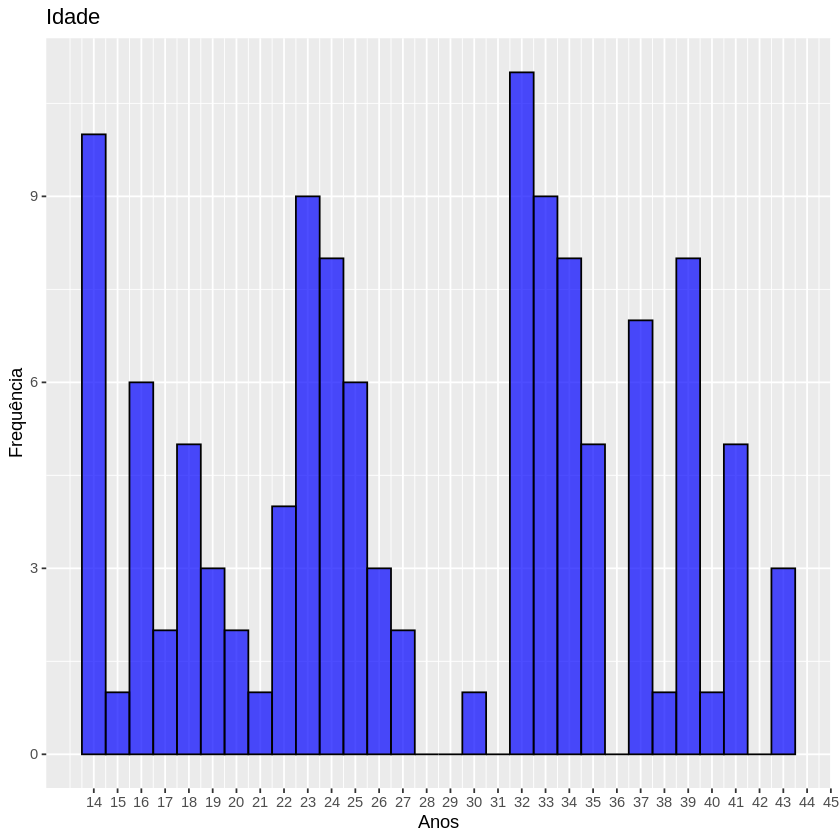

In [43]:
idades <- bd$idade
# Cria um objeto ggplot com os dados e mapeie a variável "idades" para o eixo x
p <- ggplot(data = data.frame(idades = idades), aes(x = idades))

# Adiciona um geom_histogram para criar o histograma
p + geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Idade", x = "Anos", y = "Frequência") +
  scale_x_continuous(breaks = seq(14, 45, by = 1))

# Histograma Status Tabágico da Mãe
- 1 = Fumante
- 2 = Não fumante
- 3 = Ex-fumante

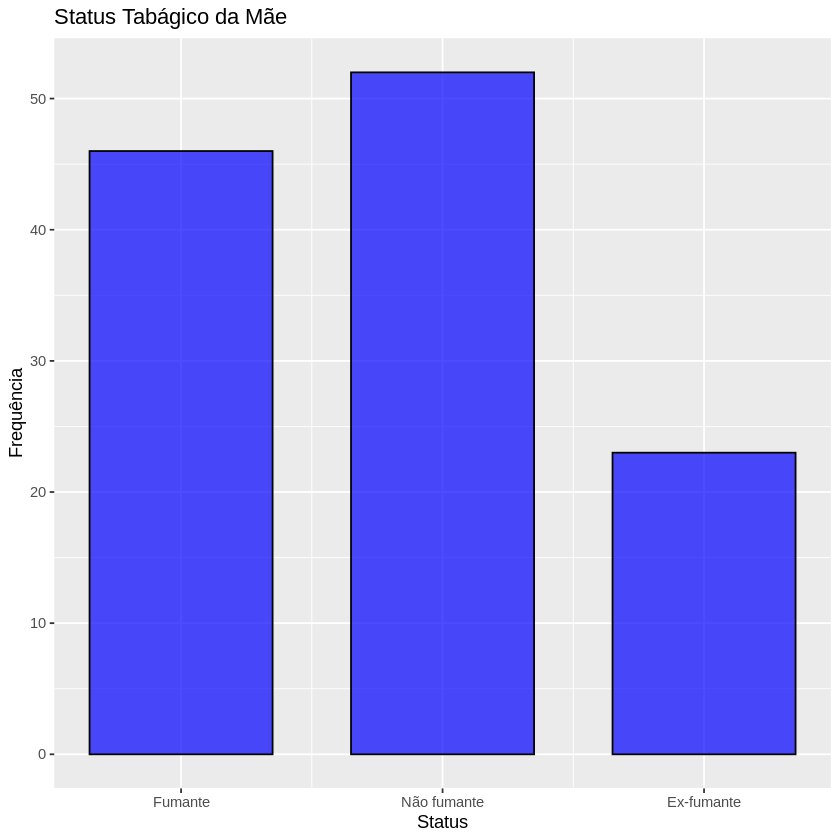

In [44]:
fumo <- bd$fumo

# Definindo um vetor de rótulos correspondentes ao números de status no data frame
rotulos <- c("Fumante", "Não fumante", "Ex-fumante")

# Cria um objeto ggplot com os dados e mapeie a variável "fumo" para o eixo x
p <- ggplot(data = data.frame(fumo = fumo), aes(x = fumo))

# Adiciona um geom_histogram para criar o histograma
p + geom_bar(width = 0.7, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Status Tabágico da Mãe", x = "Status", y = "Frequência") +
  scale_x_continuous(breaks = 1:3, labels = rotulos)

**Moda de Idade é = 32**

**A média de Idade é = 28**

**O Desvio Padrão da Idade é de 8,63**

# Questão 3)
- Com o objetivo de determinar se as variáveis avaliadas no banco (escolha 3 variáveis) estão associadas a variável grupo. Estruture as tabelas necessárias (tabelas cruzadas pela variável Grupo) e interprete os resultados, apenas de forma descritiva, ou seja, não é necessário utilizar teste estatístico.
- Criando as tabelas cruzadas com a biblioteca ***gmodels***

# Tabela Cruzada ( Grupo x Status Tabágico da Mãe )

In [45]:
library(gmodels)
Grupo <- bd$grupo #Adiciona a coluna de grupo a variável
Status_Fumo <- bd$fumo #Adiciona  a coluna de fumo a variável
#Mapeia os tipos de grupos relativos ao label respectivo
Grupo <- factor(bd$grupo, levels = c(1, 2), labels = c("Infecção por Pseudomona aeruginosa", "Infecção por outros germes"))
#Mapeia os tipos de fumo para os labels respectivos
Status_Fumo <- factor(bd$fumo, levels = c(1, 2, 3), labels = c("Fumante", "Não fumante", "Ex-fumante"))
# Utilizando as variáveis mapeadas cria a tabela cruzada
Tabela_Cruzada= CrossTable(Grupo, Status_Fumo,
  prop.chisq = FALSE,
  prop.r = FALSE,
  prop.c = FALSE,
  prop.t = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  121 

 
                                   | Status_Fumo 
                             Grupo |     Fumante | Não fumante |  Ex-fumante |   Row Total | 
-----------------------------------|-------------|-------------|-------------|-------------|
Infecção por Pseudomona aeruginosa |          16 |          23 |           6 |          45 | 
-----------------------------------|-------------|-------------|-------------|-------------|
        Infecção por outros germes |          30 |          29 |          17 |          76 | 
-----------------------------------|-------------|-------------|-------------|-------------|
                      Column Total |          46 |          52 |          23 |         121 | 
-----------------------------------|-------------|-------------|-------------|-------------|

 


# Tabela Cruzada (Grupo x Peso do Bebê na Internação)


In [91]:
library(gmodels)

# Supondo que o menor peso seja 400g e o maior seja 2400g, porém incluindo 410 e 2340 que são os extremos reais
bins <- seq(400, 2400, by = 200)

# Criar rótulos para os intervalos
labels <- c("400-599g", "600-799g", "800-999g", "1000-1199g", "1200-1399g", "1400-1599g", "1600-1799g", "1800-1999g", "2000-2199g", "2200-2400g")

# Aplicar o corte com os intervalos e rótulos
Peso_Bebe_Internação <- cut(bd$pesobebeint, breaks = bins, labels = labels, include.lowest = TRUE, right = TRUE)

# Criar um fator para a variável de grupo
Grupo <- factor(bd$grupo, levels = c(1, 2), labels = c("Infecção por Pseudomona aeruginosa", "Infecção por outros germes"))

# Cria a tabela cruzada usando a variável de peso com os intervalos estabelecidos
Tabela_Cruzada = CrossTable(Grupo, Peso_Bebe_Internação,
  prop.chisq = FALSE,
  prop.r = FALSE,
  prop.c = FALSE,
  prop.t = FALSE)



 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  121 

 
                                   | Peso_Bebe_Internação 
                             Grupo |   400-599g |   600-799g |   800-999g | 1000-1199g | 1200-1399g | 1400-1599g | 1600-1799g | 1800-1999g | 2000-2199g | 2200-2400g |  Row Total | 
-----------------------------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|
Infecção por Pseudomona aeruginosa |          6 |          0 |         10 |          5 |          6 |          0 |          5 |         10 |          3 |          0 |         45 | 
-----------------------------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|
        Infecção por outros germes |          0 |          5 |         15 

# Tabela Cruzada (Grupo x Tipo de Parto)

In [47]:
library(gmodels)
Grupo <- bd$grupo
Tipo_de_Parto <- bd$tipodeparto
Grupo <- factor(bd$grupo, levels = c(1, 2), labels = c("Infecção por Pseudomona aeruginosa", "Infecção por outros germes"))
Tipo_de_Parto <- factor(bd$tipodeparto, levels = c(1, 2), labels = c("Vaginal", "Cesariano"))

# Utilizando as variáveis mapeadas cria a tabela cruzada
Tabela_Cruzada= CrossTable(Grupo, Tipo_de_Parto,
  prop.chisq = FALSE,
  prop.r = FALSE,
  prop.c = FALSE,
  prop.t = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  121 

 
                                   | Tipo_de_Parto 
                             Grupo |   Vaginal | Cesariano | Row Total | 
-----------------------------------|-----------|-----------|-----------|
Infecção por Pseudomona aeruginosa |        22 |        23 |        45 | 
-----------------------------------|-----------|-----------|-----------|
        Infecção por outros germes |        10 |        66 |        76 | 
-----------------------------------|-----------|-----------|-----------|
                      Column Total |        32 |        89 |       121 | 
-----------------------------------|-----------|-----------|-----------|

 
